In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
t_click = './jDD_data/t_click.csv'
t_loan_sum = './jDD_data/t_loan_sum.csv'
t_loan = './jDD_data/t_loan.csv'
t_order = './jDD_data/t_order.csv'
t_user = './jDD_data/t_user.csv'

# t_click

In [10]:
df_click = pd.read_csv(t_click,header=0)
df_click.head()
# df_click.tail()

,uid,click_time,pid,param
0,12177,2016-10-04 12:22:30,1,19
1,29226,2016-10-04 12:18:42,6,1
2,37351,2016-10-04 12:18:41,10,16
3,82053,2016-10-04 12:18:16,1,40
4,82053,2016-10-04 12:18:46,1,40


In [15]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933016 entries, 0 to 10933015
Data columns (total 4 columns):
uid           int64
click_time    object
pid           int64
param         int64
dtypes: int64(3), object(1)
memory usage: 333.6+ MB


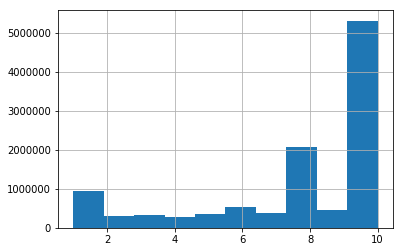

In [19]:
# print(df_click['pid'].value_counts())
df_click['pid'].hist(bins=10)

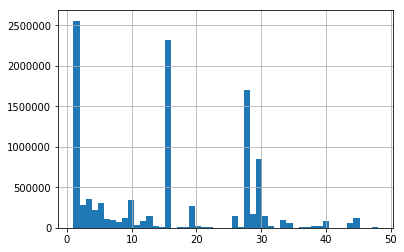

In [20]:
df_click['param'].hist(bins=50)

In [28]:
print('有点击行为用户数量',len(df_click['uid'].unique()))

有点击行为用户数量 78439


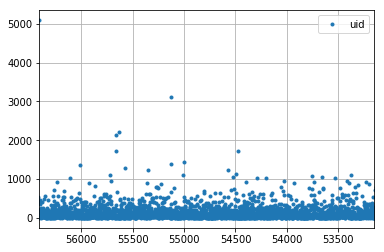

In [40]:
df_click['uid'].value_counts().plot(grid=True,style=".")
plt.legend()
plt.show()

# t_loan_sum

In [42]:
df_loan_sum = pd.read_csv(t_loan_sum,header=0)
df_loan_sum.head()

,uid,month,loan_sum
0,4,2016-11,4.723017
1,5,2016-11,6.584075
2,6,2016-11,6.266691
3,17,2016-11,5.657311
4,19,2016-11,5.885770


In [43]:
df_loan_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19520 entries, 0 to 19519
Data columns (total 3 columns):
uid         19520 non-null int64
month       19520 non-null object
loan_sum    19520 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 457.6+ KB


In [46]:
df_loan_sum.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,19520.0,45568.493648,26229.380257,4.000000,22805.750000,45870.000000,68293.250000,90991.000000
loan_sum,19520.0,5.568962,0.710507,3.862595,5.153538,5.700626,6.087953,8.433019


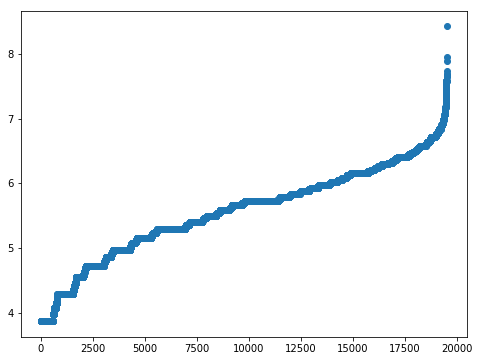

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_loan_sum.shape[0]),np.sort(df_loan_sum['loan_sum']))

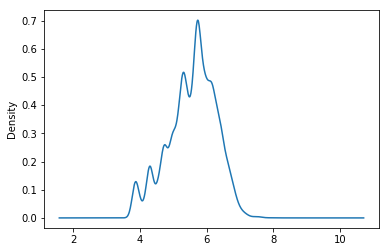

In [52]:
df_loan_sum['loan_sum'].plot(kind='kde')

In [54]:
df_user = pd.read_csv(t_user,header=0)

In [57]:
df1 = pd.merge(df_user,df_loan_sum,how='left')
df1.fillna(0,inplace=True)

In [58]:
df1.head()

,uid,age,sex,active_date,limit,month,loan_sum
0,26308,30,1,2016-02-16,5.974677,2016-11,5.50118
1,78209,40,1,2016-02-21,5.292154,0,0.00000
2,51930,35,1,2016-04-19,6.292055,0,0.00000
3,10113,25,1,2016-03-12,6.292055,0,0.00000
4,17067,35,1,2016-02-16,5.974677,0,0.00000


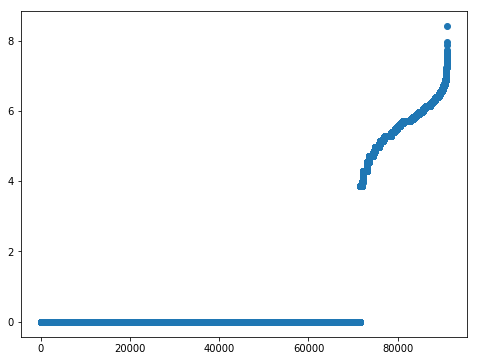

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(range(df1.shape[0]),np.sort(df1['loan_sum']))

# t.loan

In [96]:
df_loan = pd.read_csv(t_loan,header=0)
df_loan.head()

,uid,loan_time,loan_amount,plannum
0,12135,2016-08-03 00:05:26,3.862595,1
1,41403,2016-08-03 00:13:25,5.584137,3
2,74458,2016-08-03 00:13:58,4.723017,1
3,12959,2016-08-03 00:19:33,3.862595,1
4,89641,2016-08-03 00:23:13,4.292651,1


In [97]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202902 entries, 0 to 202901
Data columns (total 4 columns):
uid            202902 non-null int64
loan_time      202902 non-null object
loan_amount    202902 non-null float64
plannum        202902 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB


In [98]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,202902.0,45708.612586,26178.292813,4.000000,23252.000000,45742.000000,68524.000000,90993.000000
loan_amount,202902.0,4.913411,0.732764,2.867536,4.292651,4.885961,5.405416,7.584062
plannum,202902.0,4.394107,4.448728,1.000000,1.000000,1.000000,6.000000,12.000000


In [99]:
def convert_time(time):
    return 

In [102]:
df_loan['month'] = df_loan['loan_time'].map(lambda x: int(x.split('-')[1]))

In [104]:
print('8月贷款的用户数量:',len(df_loan[df_loan['month']== 8]['uid'].unique()))
print('9月贷款的用户数量:',len(df_loan[df_loan['month']== 9]['uid'].unique()))
print('10月贷款的用户数量:',len(df_loan[df_loan['month']== 10]['uid'].unique()))
print('11月贷款的用户数量:',len(df_loan[df_loan['month']== 11]['uid'].unique()))

8月贷款的用户数量: 19534
9月贷款的用户数量: 21628
10月贷款的用户数量: 21381
11月贷款的用户数量: 19520


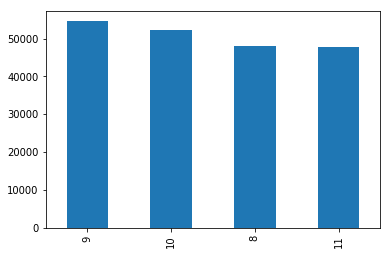

In [105]:
df_loan['month'].value_counts().plot(kind='bar')

In [123]:
df_chae = df_loan.groupby(['uid','month'],as_index=False).sum()
df_chae = df_chae[df_chae['month']==11]
df_chae = pd.merge(df_chae,df_loan_sum,how='outer')
df_chae

,uid,month,loan_amount,plannum,loan_sum
0,4,11,4.723017,3.0,NaN
1,5,11,6.584075,12.0,NaN
2,6,11,6.266691,6.0,NaN
3,17,11,5.657311,12.0,NaN
4,19,11,5.885770,12.0,NaN
5,23,11,3.862595,1.0,NaN
6,39,11,29.301829,84.0,NaN
7,43,11,5.292154,1.0,NaN
8,45,11,16.737691,3.0,NaN
9,56,11,6.722719,1.0,NaN


In [116]:
df_loan.sort_values(['uid','month'])

,uid,loan_time,loan_amount,plannum,month
34423,4,2016-08-05 08:11:38,5.292154,1,8
70516,4,2016-08-12 21:51:25,5.153538,1,8
160681,4,2016-10-29 17:52:58,5.836041,12,10
190411,4,2016-10-14 19:09:13,5.153538,1,10
167918,4,2016-11-27 14:10:18,4.723017,3,11
61388,5,2016-11-09 08:13:17,6.584075,12,11
11338,6,2016-09-11 12:14:52,6.266691,3,9
129383,6,2016-11-10 13:54:21,6.266691,6,11
59949,17,2016-11-03 11:06:02,5.657311,12,11
43827,19,2016-09-08 08:18:06,4.861602,3,9


In [124]:
import math
for i in range(2,11):
    loan_amount = math.pow(i,5.584137)
    print(i,loan_amount)

2 47.972542568354925
3 461.6474616649102
4 2301.3648404726255
5 8000.999865390347
6 22146.402506292907
7 52377.315277093636
8 110402.32277488838
9 213118.37886165478
10 383828.3066318405


In [126]:
round(math.pow(5,5.584137)-1)

8000

In [129]:
def change_data(x):
    return round(math.pow(5,x)-1)

df_loan_sum['loan_sum'] = df_loan_sum['loan_sum'].map(lambda x: change_data(x))
df_loan['loan_amount'] = df_loan['loan_amount'].map(lambda x: change_data(x))
df_chae = df_loan.groupby(['uid','month'],as_index=False).sum()
df_chae = df_chae[df_chae['month']==11]
df_chae = pd.merge(df_chae,df_loan_sum,how='outer',on='uid')
df_chae['diff'] = df_chae['loan_sum']-df_chae['loan_amount']

OverflowError: math range error

C:\Users\Weizh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Weizh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


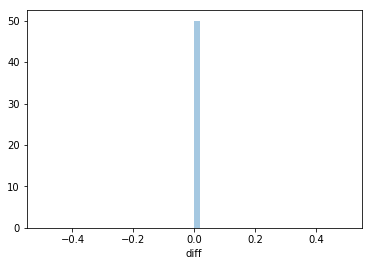

In [130]:
sns.distplot(df_chae['diff'])

In [131]:
df1 = df_loan.copy()
df1 = df1.groupby(['uid','month'],as_index=False).sum()
df1.head()

,uid,month,loan_amount,plannum
0,4,8,9000,2
1,4,10,16000,13
2,4,11,2000,3
3,5,11,40000,12
4,6,9,24000,3
